<a href="https://colab.research.google.com/github/CharlaChai/COMBINE_workshop/blob/main/1_CellGraphBasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook Details

- Understand the concept of constructing graph networks to mimic image data

# Process:

1. Identify cells and boundaries
   
2. Convert to polygons
   
3. Create a 'Voronoi' graph to identify edges
   

The goal is to convert a cell image into a graph network!
<!-- ![](../Cells_IF.jpg) -->
<!-- <img src="https://github.com/CharlaChai/COMBINE_workshop/blob/main/assets/Cells_IF.jpg?raw=1" style="width:250px"> &nbsp; -->
<!-- <img src="https://github.com/CharlaChai/COMBINE_workshop/blob/main/assets/Voronoi_sample.png?raw=1" style="height:350px"> -->
<img src="assets/Cells_IF.jpg" style="width:250px"> &nbsp;
<img src="assets/Voronoi_sample.png" style="height:350px">
***
***

### Why Voronoi?

- The voronoi method is a way to partition a plane into multiple 'cells'
  
- It helps to identify the boundaries, and thus establish adjacency

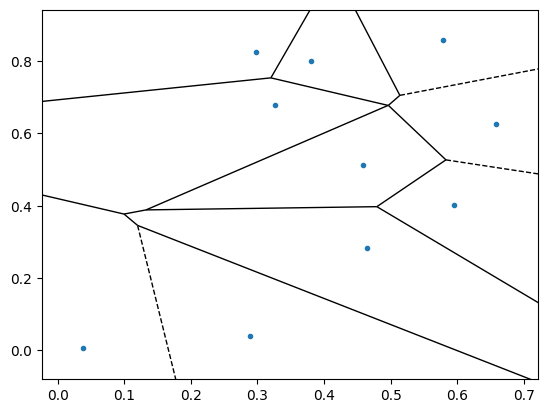

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

# Generate random points
points = np.random.rand(10, 2)  # You can change the number of points

# Create Voronoi diagram
vor = Voronoi(points)

# Plot Voronoi diagram
voronoi_plot_2d(vor, show_vertices=False, show_points=True)

# Display the plot
plt.show()

Example:

<img src="assets/Voronoi_basic.png" style="height:300px">
<!-- <img src="https://github.com/CharlaChai/COMBINE_workshop/blob/main/assets/Voronoi_basic.png?raw=1" style="height:300px"> -->

***
# Synthetic Construction:

We are creating a random dataset to mimic cell positions and convert them into a graph network representation

In [ ]:
### Packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
from shapely.geometry import Polygon
from shapely.geometry import Point
from shapely.affinity import translate
import networkx as nx

In [ ]:
### Functions:
# Function to generate random polygons
def generate_random_polygon(center, num_vertices, radius=0.1):
    angle_step = 2 * np.pi / num_vertices
    angles = np.linspace(0, 2 * np.pi, num_vertices, endpoint=False)
    np.random.shuffle(angles)
    points = [
        (center[0] + np.cos(angle) * radius, center[1] + np.sin(angle) * radius)
        for angle in angles
    ]
    return Polygon(points)

# Generate random non-overlapping polygons
def generate_non_overlapping_polygons(num_polygons, num_vertices, max_attempts=1000):
    polygons = []
    attempts = 0
    while len(polygons) < num_polygons and attempts < max_attempts:
        # Generate random center
        center = np.random.rand(2)
        polygon = generate_random_polygon(center, num_vertices)

        # Ensure polygon is within bounds and not overlapping
        if polygon.is_valid and all(polygon.disjoint(p) for p in polygons):
            polygons.append(polygon)

        attempts += 1

    return polygons

## 1. Identify cell boundaries

- There are tools called StarDist, Cellpose-SAM that identifes cell boundaries from images
- This file focuses on synthetic data

## 2. Map polygons

- Think of them as cells from the image!

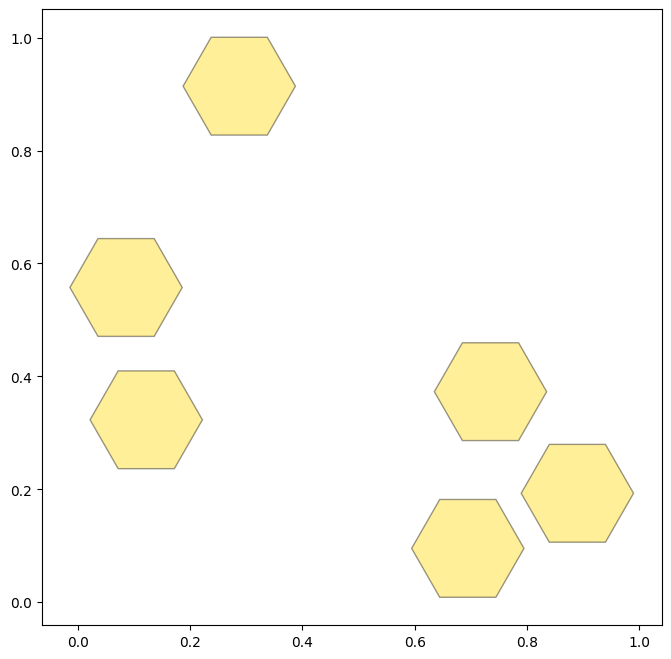

In [ ]:
num_polygons = 6
num_vertices = 6
polygons = generate_non_overlapping_polygons(num_polygons, num_vertices)

# Plot original polygons
fig, ax = plt.subplots(figsize=(8, 8))
for polygon in polygons:
    x, y = polygon.exterior.xy
    ax.fill(x, y, alpha=0.4, fc='gold', ec='black')


## 3. Construct voronoi and identify edges

- We can essentially connect all the cells with edges
  
<img src="assets/poly1_all.png" style="height:300px">
<!-- <img src="https://github.com/CharlaChai/COMBINE_workshop/blob/main/assets/poly1_all.png?raw=1" style="height:300px"> -->

- Voronoi method helps to connect only 'adjacent' cells
    
<img src="assets/poly1_adj.png" style="height:300px">
<!-- <img src="https://github.com/CharlaChai/COMBINE_workshop/blob/main/assets/poly1_adj.png?raw=1" style="height:300px"> -->

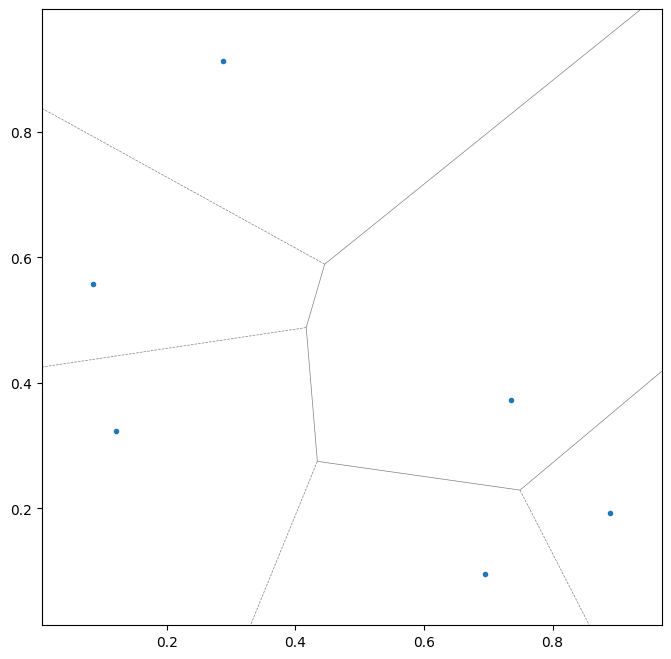

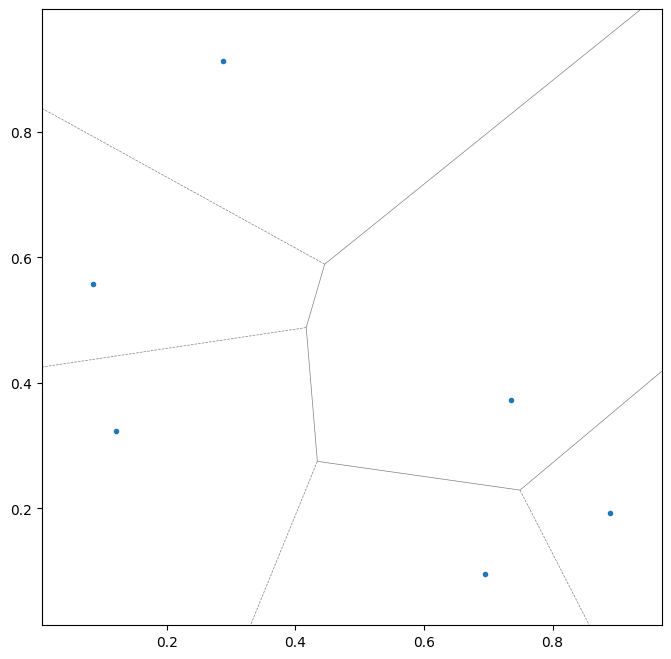

In [ ]:
# Extract the centroids of the polygons as the points for Voronoi
points = np.array([polygon.centroid.coords[0] for polygon in polygons])

# Create Voronoi diagram
vor = Voronoi(points)

# Plot Voronoi diagram
fig, ax = plt.subplots(figsize=(8, 8))
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='gray', line_width=0.5)


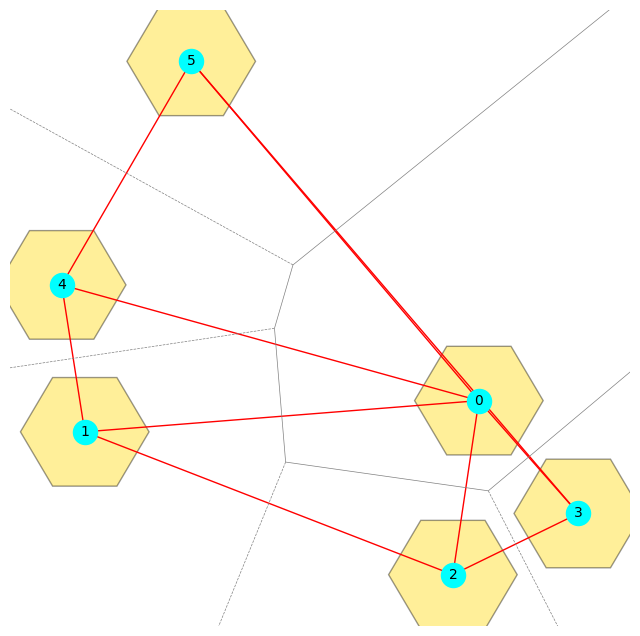

In [ ]:
# Extract the centroids of the polygons as the points for Voronoi
points = np.array([polygon.centroid.coords[0] for polygon in polygons])

# Create Voronoi diagram
vor = Voronoi(points)

# Plot Voronoi diagram
fig, ax = plt.subplots(figsize=(8, 8))
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='gray', line_width=0.5)


# Plot original polygons
for polygon in polygons:
    x, y = polygon.exterior.xy
    ax.fill(x, y, alpha=0.4, fc='gold', ec='black')

# Create a graph from Voronoi vertices
G = nx.Graph()

# Add nodes for each Voronoi region
for i, point in enumerate(points):
    G.add_node(i, pos=point)

# Add edges for adjacent regions from Voronoi ridges
for ridge_points in vor.ridge_points:
    G.add_edge(*ridge_points)

# Visualise the graph with edges between adjacent centroids
pos = {i: point for i, point in enumerate(points)}
nx.draw(G, pos, node_color='cyan', edge_color='red', with_labels=True, node_size=300, font_size=10, ax=ax)

# Customize the plot
# plt.title("Voronoi Diagram with Non-Overlapping Polygons")
# ax.set_xlim(-0.5, 1)
# ax.set_ylim(-0.25, 1.25)

# Show plot
plt.show()

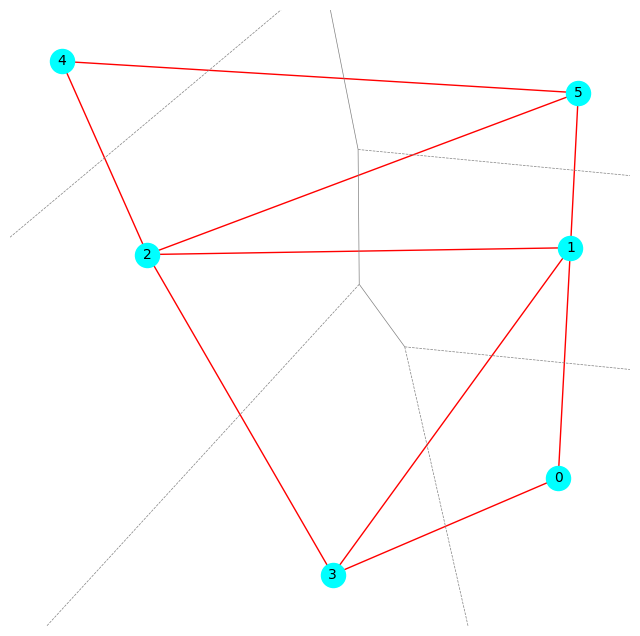

In [ ]:
# Extract the centroids of the polygons as the points for Voronoi
points = np.array([polygon.centroid.coords[0] for polygon in polygons])

# Create Voronoi diagram
vor = Voronoi(points)

# Plot Voronoi diagram
fig, ax = plt.subplots(figsize=(8, 8))
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='gray', line_width=0.5)

# Create a graph from Voronoi vertices
G = nx.Graph()

# Add nodes for each Voronoi region
for i, point in enumerate(points):
    G.add_node(i, pos=point)

# Add edges for adjacent regions from Voronoi ridges
for ridge_points in vor.ridge_points:
    G.add_edge(*ridge_points)

# Visualise the graph with edges between adjacent centroids
pos = {i: point for i, point in enumerate(points)}
nx.draw(G, pos, node_color='cyan', edge_color='red', with_labels=True, node_size=300, font_size=10, ax=ax)

plt.show()

# Activity

## 1 - Create a random dataset made of 10 squares, and proceed to construct a graph network from the centroids